1. Gerekli kütüphaneler

In [1]:
# 🗃️ Veri okuma ve işleme
import pandas as pd  # Veri okuma, düzenleme ve DataFrame yapıları oluşturmak için
import numpy as np  # Sayısal hesaplamalar ve veri manipülasyonları yapmak için

# 📈 Grafiksel görselleştirme ve analiz
import matplotlib.pyplot as plt  # Grafik ve görselleştirme oluşturmak için (örneğin ROC eğrisi, doğruluk grafikleri)
import seaborn as sns  # Estetik ve gelişmiş grafik türleri oluşturmak için (örneğin ısı haritası)

# ⚙️ Veri ön işleme ve dönüştürme
from sklearn.preprocessing import LabelEncoder  # Kategorik verileri sayısal verilere dönüştürmek için (label encoding)
from sklearn.preprocessing import StandardScaler  # Özelliklerin ölçeklendirilmesi (standartlaştırılması) için

# 📊 Model performans değerlendirmesi ve doğrulama metrikleri
from sklearn.metrics import classification_report  # Precision, Recall, F1-score gibi performans metriklerini elde etmek için
from sklearn.metrics import confusion_matrix  # Gerçek ve tahmin değerlerini karşılaştırmak için karmaşıklık matrisi oluşturma
from sklearn.metrics import roc_auc_score  # ROC eğrisi altında kalan alanı (AUC) hesaplamak için
from sklearn.metrics import roc_curve  # ROC eğrisi verilerini hesaplamak için (TPR ve FPR)
from sklearn.metrics import precision_recall_curve  # Hassasiyet-doğruluk eğrisini oluşturmak için
from sklearn.metrics import f1_score  # F1 skorunu hesaplamak için

# 🤖 Keras ve Scikit-learn entegrasyonu
from scikeras.wrappers import KerasClassifier  # Keras modellerini scikit-learn ile uyumlu hale getirmek için (model sarmalayıcı)

# 🕵️‍♂️ Model açıklanabilirliği ve özellik önem sıralaması
from sklearn.inspection import permutation_importance  # Özelliklerin model tahminine etkisini ölçmek için (permütasyon önemi)

# ⚖️ Ağırlıklı sınıf dengesi
from sklearn.utils.class_weight import compute_class_weight  # Dengesiz sınıflar için ağırlık hesaplama

# 🤖 Yapay Sinir Ağı (YSA) oluşturma
from tensorflow.keras.models import Sequential  # Yapay sinir ağı modelini sıralı olarak oluşturmak için
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, ELU, ReLU, LeakyReLU  # Ağ katmanlarını ve aktivasyon fonksiyonlarını oluşturmak için

# 🧠 Model optimizasyonu ve öğrenme
from tensorflow.keras.optimizers import AdamW, Adam  # Optimizasyon algoritmaları (ağırlık güncelleme) için
from tensorflow.keras.callbacks import EarlyStopping  # Modeli erken durdurmak için (aşırı öğrenmeyi önleme)
from tensorflow.keras.callbacks import ReduceLROnPlateau  # Öğrenme oranını dinamik olarak azaltmak için
from tensorflow.keras.losses import BinaryCrossentropy  # İkili sınıflandırma kayıp fonksiyonunu kullanmak için

# 🧮 Sınıf dağılımı ve dengesizlik analizi
from collections import Counter  # Verideki sınıf dağılımını analiz etmek için

# ⚖️ Sınıf dengesizlik sorununu çözmek için SMOTE yöntemi
from imblearn.over_sampling import SMOTE  # Azınlık sınıfını çoğaltarak sınıf dengesizliğini gidermek için

# 💾 Model ve encoder kaydetme/yükleme işlemleri
import joblib  # Model ve diğer nesneleri dosya olarak kaydetmek/yüklemek için

2. Veriyi okuma

In [2]:
# Verileri oku
train_df = pd.read_csv("../datasets/normal/train_mental.csv")
test_df = pd.read_csv("../datasets/normal/test_mental.csv")

# Özellik ve hedef ayır
X_train = train_df.drop("support_needed", axis=1)
y_train = train_df["support_needed"]

X_test = test_df.drop("support_needed", axis=1)
y_test = test_df["support_needed"]

print("✅ Eğitim verisi:", X_train.shape)
print("✅ Test verisi:", X_test.shape)
print("🎯 Sınıf dağılımı (y_train):\n", y_train.value_counts())

✅ Eğitim verisi: (1007, 23)
✅ Test verisi: (252, 23)
🎯 Sınıf dağılımı (y_train):
 support_needed
0    528
1    479
Name: count, dtype: int64


3. SMOTE ile veri dengeleme

In [3]:
# 🎯 Orijinal sınıf dağılımı
print("🎯 Orijinal sınıf dağılımı:", Counter(y_train))

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# 🎯 Dengelenmiş sınıf dağılımını kontrol etme
print("⚖️ Dengelenmiş eğitim sınıf dağılımı:", Counter(y_train_balanced))

🎯 Orijinal sınıf dağılımı: Counter({0: 528, 1: 479})
⚖️ Dengelenmiş eğitim sınıf dağılımı: Counter({0: 528, 1: 528})


4. Model Tanımı

In [ ]:
def build_ann_model():
    model = Sequential([
        Input(shape=(X_train_balanced.shape[1],)),

        # 1. Katman
        Dense(256),
        ELU(),  
        BatchNormalization(),
        Dropout(0.4),

        # 2. Katman
        Dense(128),
        LeakyReLU(alpha=0.1),
        BatchNormalization(),
        Dropout(0.3),

        # 3. Katman
        Dense(64),
        LeakyReLU(alpha=0.1),
        BatchNormalization(),
        Dropout(0.2),

        # 4. Katman
        Dense(32),
        ReLU(),
        BatchNormalization(),
        Dropout(0.2),

        # 5. Katman
        Dense(16),
        ReLU(),
        Dropout(0.1),

        # Çıkış Katmanı
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        loss=BinaryCrossentropy(),
        optimizer=AdamW(learning_rate=0.005, weight_decay=0.0001),
        metrics=['accuracy']
    )
    return model

model = build_ann_model()

model.summary()

2025-05-12 16:49:13.131135: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-05-12 16:49:13.131169: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-05-12 16:49:13.131172: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2025-05-12 16:49:13.131189: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-12 16:49:13.131202: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu (ELU)                       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,841 (202.50 KB)

 Trainable params: 50,881 (198.75 KB)

 Non-trainable params: 960 (3.75 KB)

5. Model eğitimi

In [5]:
# 🌟 Eğitim verisini DataFrame'e dönüştürme
X_train_scaled = pd.DataFrame(X_train_balanced, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test, columns=X_test.columns)

# Early stopping ve öğrenme oranı azaltma
early_stop = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=10, min_lr=1e-6)

# Sınıf ağırlıkları (Dengeli)
class_weights = dict(enumerate(compute_class_weight(class_weight='balanced', classes=np.unique(y_train_balanced), y=y_train_balanced)))

# 🌟 Model eğitimi
model = build_ann_model()
history = model.fit(
    X_train_scaled,
    y_train_balanced,
    class_weight=class_weights,
    epochs=200,
    batch_size=16,
    validation_split=0.2,
    verbose=0,
    callbacks=[early_stop, reduce_lr]  
)

print("✅ Model başarıyla eğitildi.")

# 🌟 Eğitimli modeli kaydetme
model.save("ann_model.h5")
print("✅ Model başarıyla kaydedildi.")

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
2025-05-12 16:49:14.274217: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


✅ Model başarıyla eğitildi.
✅ Model başarıyla kaydedildi.


6. Tahmin

In [6]:
def find_optimal_threshold(y_true, y_prob):
    fpr, tpr, thresholds_roc = roc_curve(y_true, y_prob)
    precision, recall, thresholds_pr = precision_recall_curve(y_true, y_prob)

    # Youden's J İstatistiği ile en iyi threshold
    j_scores = tpr - fpr
    optimal_threshold_j = thresholds_roc[np.argmax(j_scores)]
    print(f"🔍 En iyi threshold (Youden's J): {optimal_threshold_j:.4f}")

    # F1 skoru ile en iyi threshold
    f1_scores = [f1_score(y_true, (y_prob >= t).astype(int)) for t in thresholds_pr]
    optimal_threshold_f1 = thresholds_pr[np.argmax(f1_scores)]
    print(f"🔍 En iyi threshold (F1 skoru): {optimal_threshold_f1:.4f}")

    return optimal_threshold_j, optimal_threshold_f1

# Modelden olasılık tahminleri al
y_prob = model.predict(X_test).flatten()

# En iyi threshold değerini bul
optimal_threshold_j, optimal_threshold_f1 = find_optimal_threshold(y_test, y_prob)

# Deploy için en uygun threshold
optimal_threshold = optimal_threshold_f1
print(f"🌟 Model için belirlenen optimal threshold: {optimal_threshold:.4f}")

# 🌟 Threshold'u dosyaya kaydetme
try:
    with open("optimal_threshold.txt", "w") as f:
        f.write(str(optimal_threshold))
    print("✅ Optimal threshold başarıyla kaydedildi.")
except Exception as e:
    print(f"❌ Threshold kaydedilemedi: {str(e)}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
🔍 En iyi threshold (Youden's J): 0.5873
🔍 En iyi threshold (F1 skoru): 0.5873
🌟 Model için belirlenen optimal threshold: 0.5873
✅ Optimal threshold başarıyla kaydedildi.


7. Değerlendirme

📋 Sınıflandırma Raporu (ANN):

              precision    recall  f1-score   support

           0      0.903     0.917     0.910       132
           1      0.907     0.892     0.899       120

    accuracy                          0.905       252
   macro avg      0.905     0.904     0.904       252
weighted avg      0.905     0.905     0.905       252



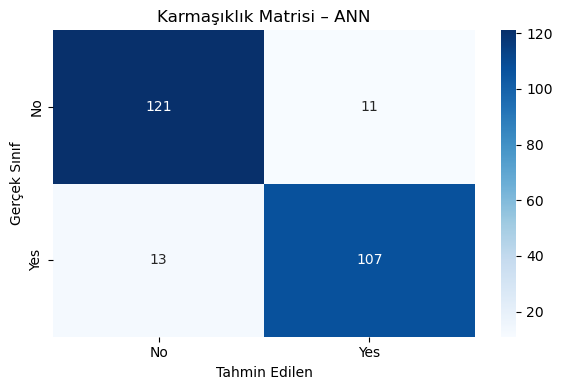

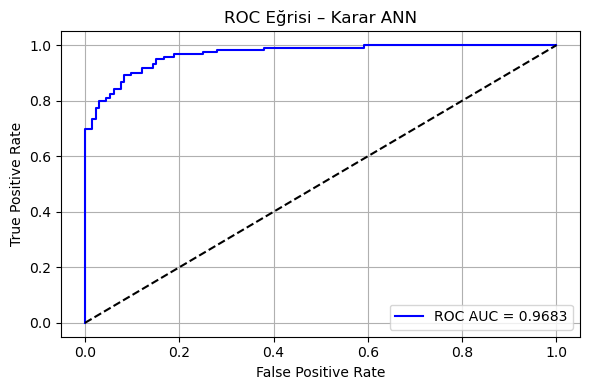

In [7]:
# 🌟 Optimal threshold ile sınıf tahmini
y_pred = (y_prob >= optimal_threshold).astype("int32")

# 📋 Sınıflandırma raporu
print("📋 Sınıflandırma Raporu (ANN):\n")
report = classification_report(y_test, y_pred, digits=3)  # 3 basamak hassasiyeti
print(report)

# 🔍 Karmaşıklık Matrisi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Karmaşıklık Matrisi – ANN")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Sınıf")
plt.tight_layout()
plt.show()

# 🌈 ROC Eğrisi
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.4f}", color="blue")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Eğrisi – Karar ANN")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

8. Deployment

In [8]:
# 📦 Modeli kaydet (sadece ANN modeli)
model.save("../saved_model/mental_ann_model_final.keras")
joblib.dump(model, "../saved_model/mental_ann_model_final.pkl")

print("💾 Model ve scaler başarıyla kaydedildi:")
print("- mental_ann_model_final.keras")
print("- mental_ann_model_final.pkl")

💾 Model ve scaler başarıyla kaydedildi:
- mental_ann_model_final.keras
- mental_ann_model_final.pkl


9. Özellik Önemi

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


✅ Eğitimli ağırlıklar yüklendi.


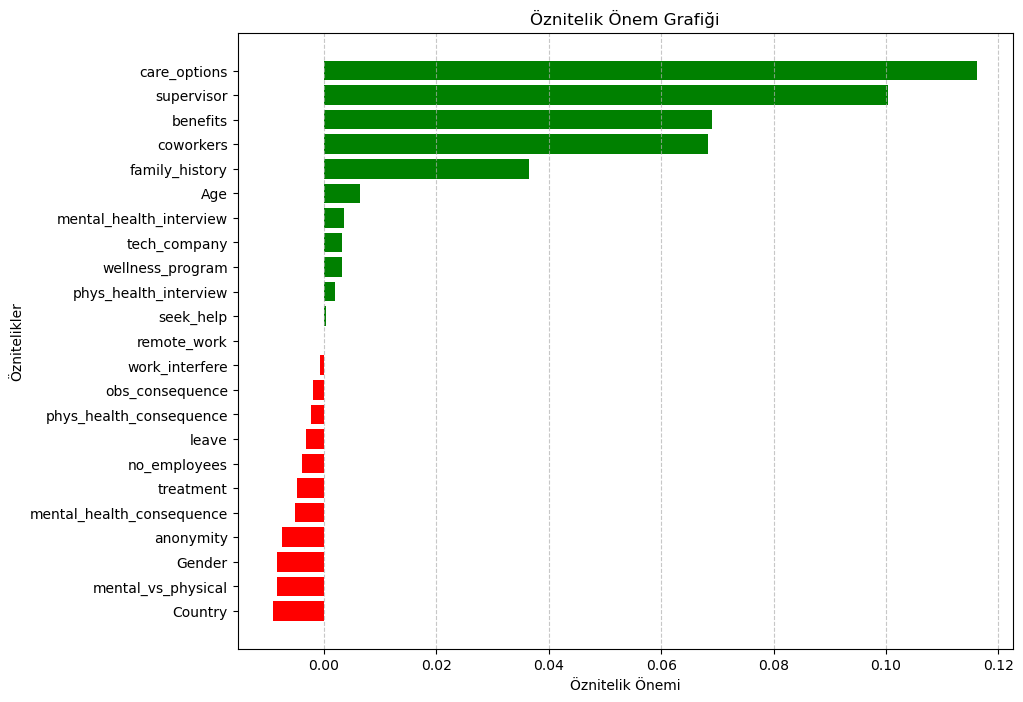

In [11]:
# 🌟 Sklearn uyumlu hale getirme
model_sklearn = KerasClassifier(
    model=build_ann_model,
    epochs=30,
    batch_size=16,
    verbose=0
)

# 🌟 Modeli yüklemek için yeniden oluşturma
model_sklearn.model = build_ann_model()
model_sklearn.model.load_weights("ann_model.h5")
print("✅ Eğitimli ağırlıklar yüklendi.")

# 🌟 Sklearn uyumlu hale getirme
model_sklearn.fit(X_train_scaled, y_train_balanced)

# 🔍 Permutation Importance hesaplama
result = permutation_importance(model_sklearn, X_test_scaled, y_test, n_repeats=10, random_state=42)

# 🗃️ Sonuçları DataFrame olarak saklama
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': result.importances_mean})

# 📊 Permütasyon önemini sıralama
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# 🌈 Grafik oluşturma
plt.figure(figsize=(10, 8))
colors = ['green' if x > 0 else 'red' for x in importance_df['Importance']]
plt.barh(importance_df['Feature'], importance_df['Importance'], color=colors)
plt.xlabel('Öznitelik Önemi')
plt.ylabel('Öznitelikler')
plt.title('Öznitelik Önem Grafiği')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()